<h1>House Prices Advanced Regression Techniques</h1><br>

**ID: AI-0007<br>
Submission date: 11-1-2018**
<br><br>

The goal of this experiment is to determine house price from the given features. Here I have tried different algorithms including ANN which was the primary requirement to determine the optimal algorithm. To begin, let's import everything necessary for the project. The index of the report is following :<br>

0.0 : [IMPORTING LIBRARIES](#LIBRARIES)<br>
1.0 : [CORRELATION MATRIX](#CORRELATION MATRIX)<br>
$\qquad$1.1 : [APPLYING DIFFERENT ALGORITHMS](#APPLYING DIFFERENT ALGORITHMS)<br>
$\qquad$1.2 : [MODIFYING TEST DATA FOR CORRELATION MATRIX](#MODIFYING TEST DATA FOR CORRELATION MATRIX)<br>
2.0 : [DATA PREPROCESSING](#DATA PREPROCESSING)<br>
$\qquad$2.1 : [ANALYSIS SALEPRICE](#ANALYSIS SALEPRICE) <br>
$\qquad$$\qquad$2.1.1 :[CHECK SALEPRICE DISTRIBUTION AND SKEWNESS](#CHECK SALEPRICE DISTRIBUTION AND SKEWNESS) <br>
$\qquad$$\qquad$2.1.2 : [LOG TRANSFORMATION](#LOG TRANSFORMATION) <br>
$\qquad$2.2 : [MISSING VALUE HANDLING](#MISSING VALUE HANDLING) <br>
$\qquad$2.3 : [DATA CONVERTION](#DATA CONVERTION) <br>
$\qquad$2.4 [ANALYSIS OTHER DATA](#ANALYSIS OTHER DATA) <br>
$\qquad$$\qquad$2.4.1 : [CHECKING SKEWNESS](#CHECKING SKEWNESS)<br>
$\qquad$$\qquad$2.4.2 : [BOX COX TRANSFORMATION](#BOX COX TRANSFORMATION) <br>
$\qquad$2.5 : [OUTLIER DETECTION](#OUTLIER DETECTION) <br>
3.0: [DIFFERENT ALGORITHMS](#DIFFERENT ALGORITHMS) <br>
$\qquad$3.1 : [RANDOM FOREST](#RANDOM FOREST) <br>
$\qquad$3.2 : [ANN WITH PARAMETER TUNER](#ANN WITH PARAMETER TUNER)<br>
$\qquad$3.3 : [ANN WITHOUT PARAMETER TUNER](#ANN WITHOUT PARAMETER TUNER) <br>
$\qquad$3.4 : [FIND OPTIMAL FEATURES](#FIND OPTIMAL FEATURES) <br>
$\qquad$3.5 : [NORMALIZATING DATA](#NORMALIZATING DATA) <br>
$\qquad$3.6 : [LASSO REGRESSOR](#LASSO REGRESSOR) <br>
4.0 : [RESULT COMPARISION](#RESULT COMPARISION) <br>
5.0 : [CONCLUSION](#CONCLUSION)<br>
6.0 : [REFERENCES](#REFERENCES)

<a id="LIBRARIES"></a>
## STEP 0.0 : IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.linear_model import Lasso, LassoCV, Ridge, ElasticNetCV, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer, Imputer,RobustScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

import itertools
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


**Creating self-defined functions**<br>
Before getting into the dataset, here I have built some functions that will come handy while solving the problem. Thus, eliminating writing the same code again and again. The purpose of the functions I've created are in order given below
1. Finding optimal features
2. Rank the features
3. Plot the features in terms of importance
4. Parameter tuner for ANN(find optimal hyperparameter)
5. Normalizer
6. Cross-validation score calculator
7. Generating output

In [23]:
#find optimal features for a regration problem
def optimal_features(x,y):
    clf_lr = LinearRegression() 
    rfecv = RFECV(estimator=clf_lr, step=1, cv=10)
    rfecv = rfecv.fit(x, y)

    print('Optimal number of features :', rfecv.n_features_)
    print('Best features :', x.columns[rfecv.support_])
    return list(x.columns[rfecv.support_])

In [24]:
def rank_features_with_header(X_train,y_train):
    lr = LinearRegression()
    rfe = RFE(lr, n_features_to_select=1)
    selector = rfe.fit(X_train,y_train)
    rank = selector.ranking_
    
    headers = list(X_train.head(0))

    l = [i for i in range(1,len(headers)+1)]
    a = np.array(l)

    feature_sequence = []
    for i in a:
        index = np.where(rank==i)
        k = list(index)
        position = int(k[0])
        feature_sequence.append(headers[position])

    return feature_sequence

In [25]:
def plot_feature_under_importence(ranked_feature):
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(12,12))

    # Example data
    features = ranked_feature
    y_pos = np.arange(len(features))
    performance = [i for i in range(len(ranked_feature),0,-1)] 
    error = np.random.rand(len(features))

    ax.barh(y_pos, performance, align='center', color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Importence')
    ax.set_title('How importent a feature is')
    plt.show()

In [26]:
def param_tuning(X,y):
    
    BestScore = 0
    best_num_label = 0
    FirstLayer = X.shape[1]+1*(2//3)
    SecondLayer = FirstLayer//2
    ThirdLayer = SecondLayer//2
    forthLayer = ThirdLayer//2
    fifthLayer = forthLayer//2
    
    number_of_hidden_layers = [FirstLayer,SecondLayer,ThirdLayer,forthLayer,fifthLayer]
    #hidden_layer = []
    #for NHL in number_of_hidden_layers:
        #hidden_layer.append(NHL)

    NN = MLPRegressor(hidden_layer_sizes=number_of_hidden_layers,max_iter=500000, early_stopping=True)
    activation_options = ['identity', 'logistic', 'tanh', 'relu']
    solver_options =['lbfgs', 'adam']
    #learning_rate_options = ['constant', 'invscaling', 'adaptive']
    param_gridNN = dict(activation=activation_options,
                        solver=solver_options)
                        #learning_rate = learning_rate_options)
    gridNN = GridSearchCV(NN,param_gridNN,cv=10)
    print("Starting Training for " + format(number_of_hidden_layers))
    gridNN.fit(X,y)
    print("Ending Training for " + format(number_of_hidden_layers))

    if gridNN.best_score_>BestScore:
        best_num_label = number_of_hidden_layers
        Best = gridNN
        BestScore = gridNN.best_score_


    print(best_num_label)
    print(BestScore)
    return Best

In [27]:
# normalizing the data 
def normalize_data(X):
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    print(X_scaled.shape)
    return X_scaled

In [28]:
def cross_val_score_calculation(clf,X,y):
    clf.fit(X, y)
    accuracys = cross_val_score(clf, X,y,cv = 5)
    print(accuracys)
    print(np.average(accuracys))
    return np.average(accuracys)

In [29]:
def create_result_csv(y,predictions_id):
    output = pd.DataFrame()
    output['ID'] = predictions_id
    output['SalePrice'] = y
    output.to_csv("test_y.csv", encoding='utf-8', index=False)

Now that some functions are created for ease of use, let's get into the dataset.

<a id="CORRELATION MATRIX"></a>
## STEP 1.0 : CORRELATION MATRIX


at first, let's look into the **correlation matrix** to see which feature is related to which feature. So we can optimize the dataset

In [10]:
#importing the training dataset
data = pd.read_csv("train.csv")

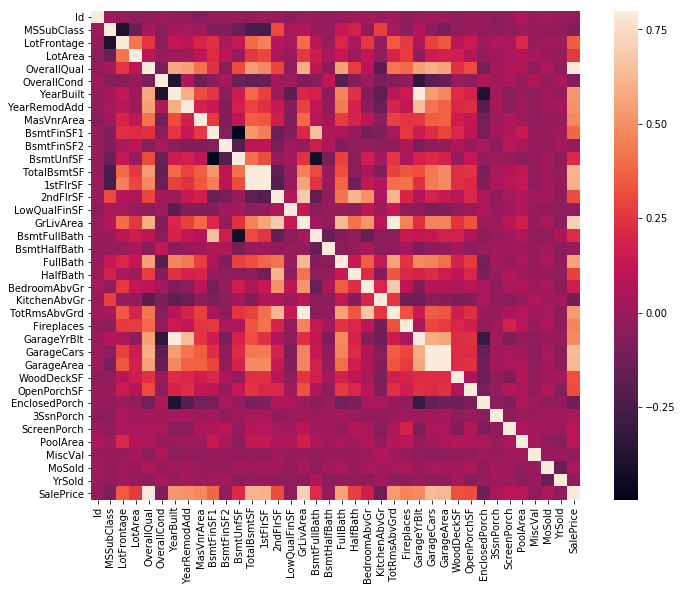

In [11]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

correlation matrix shows us there are several features whose co-relation value is greater then 0.5

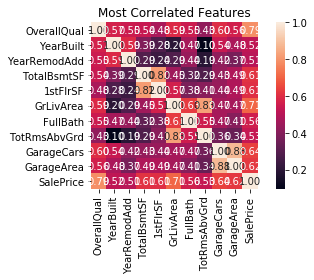

In [12]:
# Most Correlated Features
cols = corrmat.index[abs(corrmat['SalePrice']) > 0.5]
sns.heatmap(data[cols].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.title('Most Correlated Features')
plt.tight_layout()
plt.show()

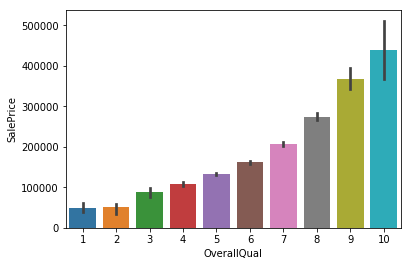

In [13]:
sns.barplot(data.OverallQual,data.SalePrice)
plt.show()

From the barplot above we can see that the saleprice is highly co-related with the OverallQual. This means that the heatmap is accurate. Now check, if there is any **missing value** in the features selected from the above heatmap

In [14]:
feature = ['SalePrice', 'YearBuilt', 'OverallQual', 'GarageCars', 'GrLivArea', 'TotalBsmtSF', 'FullBath','GarageArea','1stFlrSF','TotRmsAbvGrd','YearRemodAdd']
data[feature].isnull().values.any()

False

so, there is no missing value.

now from some **domain knowledge** we know, Neighborhood (Physical locations within Ames city) is an importent feature. So I've added the **neighborhood** feature into the feature set. And then I've removed the saleprice because this is the feature I'll be predicting.

In [15]:
feature.append('Neighborhood')
new_data = data[feature]

In [16]:
y = data.SalePrice
drop_list = ["SalePrice"]
#len(y)

I've dropped the saleprice from X here and then used **one-hot encoding** to the features.

In [17]:
X = new_data.drop(drop_list,axis=1)
X = pd.get_dummies(X)

Now, by calling the self-defined functions from above, we'll rank the features and plot them. Since we've added neighborhood from domain knowledge, this visualization will prove whether neighborhood is actually important or not.

In [18]:
ranked_feature = rank_features_with_header(X,y)

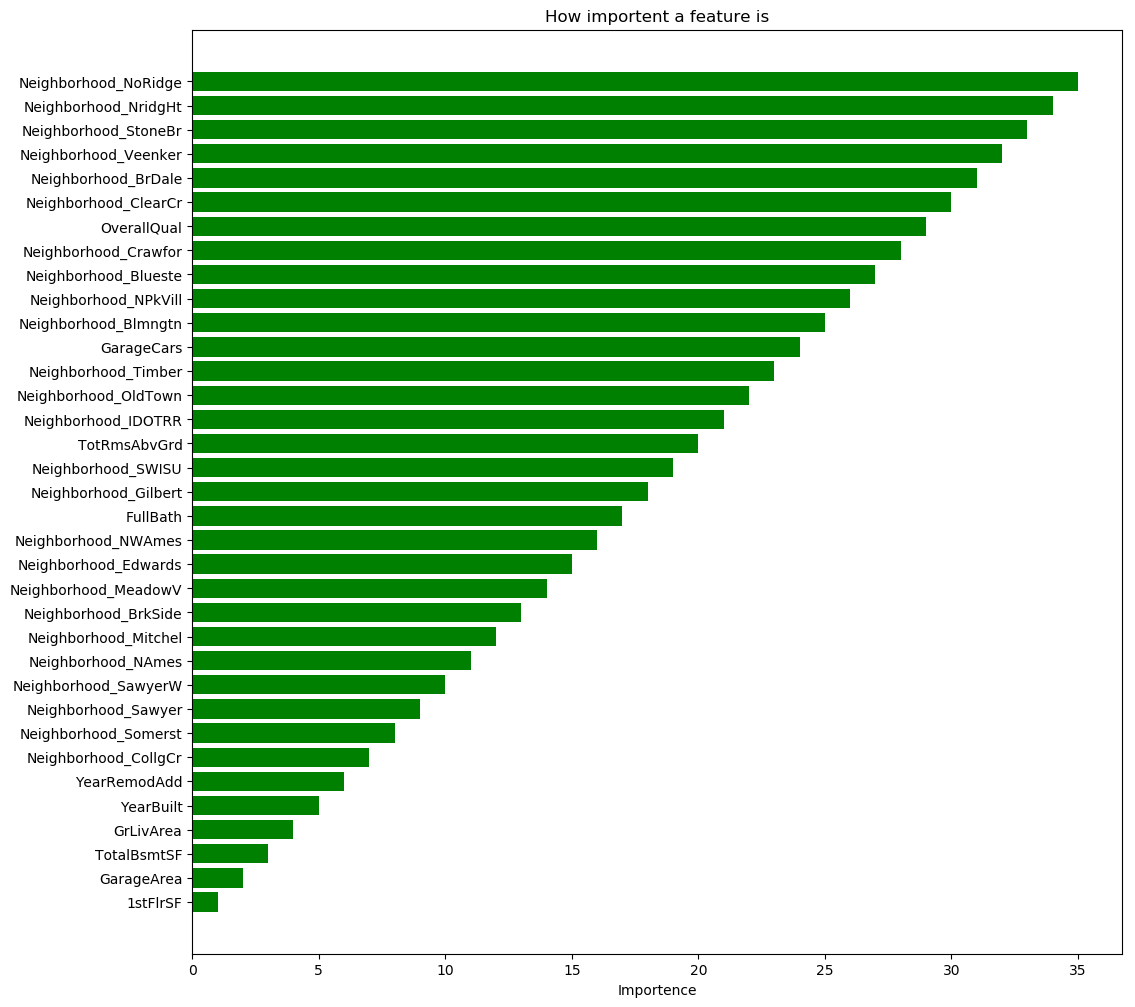

In [19]:
plot_feature_under_importence(ranked_feature)

From the barplot above, we can see that top 8 out of the 10 most important features are of neighborhood. So we can say that adding neighborhood from our domain knowledge was correct.

<a id="APPLYING DIFFERENT ALGORITHMS"></a>
## STEP 1.1 : APPLYING DIFFERENT ALGORITHMS

Now we'll be applying different algorithms to the modified dataset from **correlation matrix** and check which model gives us the most optimal output.<br>
Firstly, let's try with **random forest**

In [20]:
regrf_corelation = RandomForestRegressor(n_estimators = 150,max_depth = 10,min_samples_split = 5)
#regr = RandomForestRegressor(n_estimators = 150,max_depth = 25,min_samples_split = 10)

regrf_corelation_cv_score = cross_val_score_calculation(regrf_corelation,X, y)

[ 0.84624098  0.7852984   0.86658168  0.87627177  0.83344843]
0.841568252974


Secondly, we'll apply **ANN**. We'll be using two different approaches. one is with **parameter tuner** and the other one is **tuned manually**

In [21]:
#with parameter tuning
ANN_param_tuning_co_clf = param_tuning(X,y)
ANN_param_tuning_co_clf.get_params

Starting Training for [35, 17, 8, 4, 2]
Ending Training for [35, 17, 8, 4, 2]
[35, 17, 8, 4, 2]
0.774336341971


<bound method BaseEstimator.get_params of GridSearchCV(cv=10, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=[35, 17, 8, 4, 2], learning_rate='constant',
       learning_rate_init=0.001, max_iter=500000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'adam']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

from the parameter tuning function we found the following parameters to be optimal <br>
Activator function : Relu<br>
Solver : Adam<br>
Hidden layer size : 35, 17, 8, 4, 2<br>
Learning rate : constant<br>
Maximum Iteration : 500000<br>

In [22]:
#regrMLP_corelation = MLPRegressor(activation='relu',hidden_layer_sizes=[140, 122], learning_rate='constant', max_iter=500000, solver='adam')

regrMLP_corelation_param_tuned_cv_score = cross_val_score_calculation(ANN_param_tuning_co_clf,X,y)

[ 0.80669846  0.69455898  0.80115344  0.77032924  0.6593647 ]
0.746420962754


In [23]:
#with manual tuning
regrMLP_corelation_self_tune = MLPRegressor(hidden_layer_sizes=(550),activation='relu', solver='adam',max_iter=800 )

regrMLP_corelation_self_tuned_cv_score = cross_val_score_calculation(regrMLP_corelation_self_tune,X,y)

[ 0.74744713  0.7094155   0.7041114   0.67185512  0.50128341]
0.666822511978


In [24]:
X.describe()

,YearBuilt,OverallQual,GarageCars,GrLivArea,TotalBsmtSF,FullBath,GarageArea,1stFlrSF,TotRmsAbvGrd,YearRemodAdd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,6.099315,1.767123,1515.463699,1057.429452,1.565068,472.980137,1162.626712,6.517808,1984.865753,...,0.028082,0.05274,0.077397,0.017123,0.050685,0.040411,0.058904,0.017123,0.026027,0.007534
std,30.202904,1.382997,0.747315,525.480383,438.705324,0.550916,213.804841,386.587738,1.625393,20.645407,...,0.165264,0.22359,0.267312,0.129775,0.219429,0.196989,0.235526,0.129775,0.159271,0.086502
min,1872.000000,1.000000,0.000000,334.000000,0.000000,0.000000,0.000000,334.000000,2.000000,1950.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1954.000000,5.000000,1.000000,1129.500000,795.750000,1.000000,334.500000,882.000000,5.000000,1967.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1973.000000,6.000000,2.000000,1464.000000,991.500000,2.000000,480.000000,1087.000000,6.000000,1994.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2000.000000,7.000000,2.000000,1776.750000,1298.250000,2.000000,576.000000,1391.250000,7.000000,2004.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2010.000000,10.000000,4.000000,5642.000000,6110.000000,3.000000,1418.000000,4692.000000,14.000000,2010.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we see, not all features mean are not same. So **normalizing** data may increase cross validation score. 

In [25]:
normalized_X_train = normalize_data(X)

(1460, 35)


In [26]:
ANN_param_tune_normalize_co_clf = param_tuning(normalized_X_train,y)

Starting Training for [35, 17, 8, 4, 2]
Ending Training for [35, 17, 8, 4, 2]
[35, 17, 8, 4, 2]
0.800938648842


In [99]:
ANN_param_tune_normalize_co_clf

GridSearchCV(cv=10, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=[35, 17, 8, 4, 2], learning_rate='constant',
       learning_rate_init=0.001, max_iter=500000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'adam']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

<pre>
from the parameter tuning function we found the following parameters to be optimal 
Activator function : Relu
Solver : Adam
Hidden layer size : 35, 17, 8, 4, 2
Learning rate : constant
Maximum Iteration : 500000
</pre>

In [27]:
regrf_corelation_normalize_cv_score = cross_val_score_calculation(regrf_corelation,normalized_X_train, y)

[ 0.84667016  0.79550936  0.86467838  0.87424783  0.82074446]
0.840370039107


In [29]:
#regrMLP_co_norm = MLPRegressor(hidden_layer_sizes=(550),activation='relu', solver='adam',max_iter=15000 )
regrMLP_corelation_normalize_param_tuned_cv_score = cross_val_score_calculation(ANN_param_tune_normalize_co_clf,normalized_X_train, y)

[ 0.84629496  0.82036848  0.80806354  0.80932934  0.69561079]
0.795933422049


In [30]:
regrMLP_co_norm = MLPRegressor(hidden_layer_sizes=(550),activation='relu', solver='adam',max_iter=15000 )
regrMLP_corelation_normalize_self_tuned_cv_score = cross_val_score_calculation(regrMLP_co_norm,normalized_X_train, y)

[ 0.87302183  0.87905861  0.88026339  0.87889489  0.75805971]
0.853859687976


From these, we can see that, after normalizing the dataset, the result for random forest decreased slightly. However, the accuarcy of the neural network increased significantly.(from 0.65~ to 0.85~)

from the above two experiments, we can see that without major preprosseing, the cross validation score is not that great.Now from my models, lets check which one perform better in kaggle.

<a id="PREPARING TEST DATA FOR CORRLEATION MATRIX"></a>
## STEP 1.2 : PREPARING TEST DATA FOR CORRLEATION MATRIX

In [40]:
data_test = pd.read_csv("test.csv")

We'll need the Ids of the test dataset for our final submission, so we've dropped it from our test set but saved it in a different dataframe. The features for the test set are the ones that we got from the heatmap of the train set above.

In [41]:
test_feature = ['Id','Neighborhood' ,'YearBuilt', 'OverallQual', 'GarageCars', 'GrLivArea', 'TotalBsmtSF', 'FullBath','GarageArea','1stFlrSF','TotRmsAbvGrd','YearRemodAdd']
x_test = data_test[test_feature]
drop_list = ["Id"]
ids = x_test.Id
x_test = x_test.drop(drop_list,axis=1)

Now, let's handel missing values in test data and fill them 

In [33]:
#missing value handeling
x_test['GarageCars']=x_test['GarageCars'].fillna(2)
x_test['FullBath']=x_test['FullBath'].fillna(np.mean(x_test['FullBath']))
x_test['TotalBsmtSF']=x_test['TotalBsmtSF'].fillna(np.mean(x_test['TotalBsmtSF']))
x_test['GarageArea']=x_test['GarageArea'].fillna(np.mean(x_test['GarageArea']))

Now, with the dataset prepared, let's run **random forest** once again to see the predictions

In [34]:
x_test = pd.get_dummies(x_test)

regrf_corelation.fit(X, y)
predict_y = regrf_corelation.predict(x_test)

In [35]:
create_result_csv(predict_y,ids)

this approch give me **0.1602** mean square in kaggle<br>

In [36]:
x_test.describe()

,YearBuilt,OverallQual,GarageCars,GrLivArea,TotalBsmtSF,FullBath,GarageArea,1stFlrSF,TotRmsAbvGrd,YearRemodAdd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1971.357779,6.078821,1.766278,1486.045922,1046.117970,1.570939,472.768861,1156.534613,6.385195,1983.662783,...,0.020562,0.061001,0.086361,0.015764,0.052776,0.045236,0.065798,0.017820,0.023304,0.008910
std,30.390071,1.436812,0.775703,485.566099,442.746712,0.555190,216.974165,398.165820,1.508895,21.130467,...,0.141961,0.239414,0.280992,0.124605,0.223662,0.207894,0.248015,0.132344,0.150918,0.094005
min,1879.000000,1.000000,0.000000,407.000000,0.000000,0.000000,0.000000,407.000000,3.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1953.000000,5.000000,1.000000,1117.500000,784.000000,1.000000,318.000000,873.500000,5.000000,1963.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1973.000000,6.000000,2.000000,1432.000000,988.000000,2.000000,480.000000,1079.000000,6.000000,1992.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2001.000000,7.000000,2.000000,1721.000000,1304.000000,2.000000,576.000000,1382.500000,7.000000,2004.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2010.000000,10.000000,5.000000,5095.000000,5095.000000,4.000000,1488.000000,5095.000000,15.000000,2010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
normalized_X_test = normalize_data(x_test)

(1459, 35)


In [38]:
regrMLP_co_norm.fit(normalized_X_train, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=550, learning_rate='constant',
       learning_rate_init=0.001, max_iter=15000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [39]:
regrMLP_co_norm_pred_y = regrMLP_co_norm.predict(normalized_X_test)

In [40]:
create_result_csv(regrMLP_co_norm_pred_y,ids)

Although cross validation score of normalized ANN is better then random forest, bt random forest perform better in kaggle.<br> 
From the above experiments, we can see that without major preprosseing, the accuracy is not that great. The neural network score is even worse than random forest. Since **neural network** is our primary focus, I'll be tuning the dataset to improve accuracy furthermore. This starts with preprossesing of the test data.

<a id="DATA PREPROCESSING"></a>
## STEP 2.0 : DATA PREPROCESSING

In this approach, we'll import the provided data once again without any modification. Then we'll analyze the data for any skewness or distribution biasness and accordingly pre-process data.

In [2]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [3]:
data_train.drop("Id", axis = 1, inplace = True)
data_test.drop("Id", axis = 1, inplace = True)

<a id="ANALYSIS SALEPRICE"></a>
<h3>STEP 2.1 : ANALYSIS SALEPRICE</h3> 

<a id="CHECK SALEPRICE DISTRIBUTION AND SKEWNESS"></a>
**STEP 2.1.1 :CHECK SALEPRICE DISTRIBUTION AND SKEWNESS**

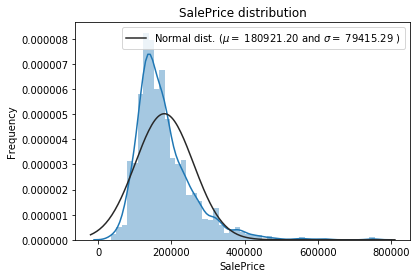

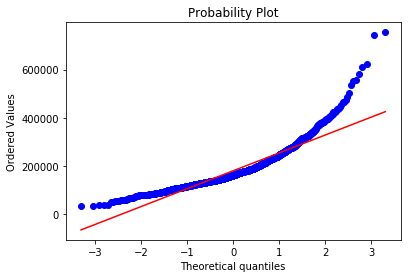

In [4]:
sns.distplot(data_train['SalePrice'] , fit=stats.norm);

(mu, sigma) = stats.norm.fit(data_train['SalePrice'])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#QQ-plot
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)
plt.show()

From the above visualization we can see that, SalePrice is positively skewed.To remove **Skewness** we can use **Log-transformation**

<a id="LOG TRANSFORMATION"></a>
**STEP 2.1.2 : LOG TRANSFORMATION**

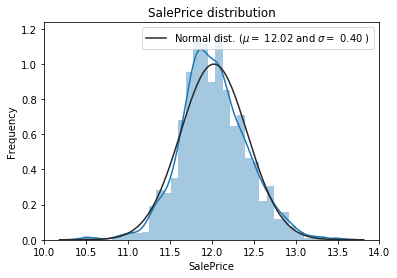

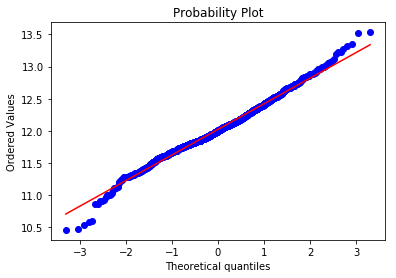

In [5]:
data_train["SalePrice"] = np.log1p(data_train["SalePrice"])
sns.distplot(data_train['SalePrice'] , fit=stats.norm);

(mu, sigma) = stats.norm.fit(data_train['SalePrice'])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#QQ-plot
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)
plt.show()

<a id="MISSING VALUE HANDLING"></a>
<H3>STEP 2.2 : MISSING VALUE HANDLING</H3>

let's merge test and train dataset for filling missing value. We merge the sets because both of the dataset need same treatment and it's time consuming to do it twice. Also, another key factor is that, from the domain knowledge, we can see that there are different types of feature values in train and test datasets. So if we do not merge them for one-hot encoding, the sizes will not match and show an error. Therefore, we merge the dataset, then preprosess it. Then we split it again.

In [6]:
ntrain = data_train.shape[0]
ntest = data_test.shape[0]
y_train = data_train.SalePrice.values
all_data = pd.concat((data_train, data_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


In [7]:
all_data.isnull().values.any()

True

So there are some missing values in the dataframe.<br>
check how many data is missing.

In [8]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


**Handelling missing data**

In [9]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

all_data = all_data.drop(['Utilities'], axis=1)

In [10]:
all_data.isnull().values.any()

False

<a id="DATA CONVERTION"></a>
<H3>STEP 2.3 : DATA CONVERTION</H3>

Now there is no missing data. Now to modify the subclasses, we at first convert them to strings, then we convert them using label-encoding

In [11]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [12]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


In [13]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

<a id="ANALYSIS OTHER DATA"></a>
<H3>STEP 2.4 ANALYSIS OTHER DATA</H3>

<a id="CHECKING SKEWNESS"></a>
**STEP 2.4.1 : CHECKING SKEWNESS**

As we see before, our SalePrice is skewed. So there may be other features who are also skewed.So find them and handle them.

In [14]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
#Skewness is a term in statistics used to describes asymmetry from the normal distribution
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


<a id="BOX COX TRANSFORMATION"></a>
**STEP 2.4.2 : BOX COX TRANSFORMATION **

In [15]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


So using **box cox transformation** we removed skewness from **59 columns** whose skewness is more then **0.75**

In [16]:
all_data = pd.get_dummies(all_data)

Now that the majority of the dataset is preprosessed, let's split them like we previously discussed. We are splitting the dataset before outlier detection because outlier detection cannot work with test set as there is no label value for test set.

In [17]:
train = all_data[:ntrain]
test = all_data[ntrain:]

<a id="OUTLIER DETECTION"></a>
<h3>STEP 2.5 : OUTLIER DETECTION</h3>

Now using **isolation forest** we will remove the outliers.

In [18]:
clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)

outliers_dataframe = y_noano[y_noano['Top'] == -1]

print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 146
Number of rows without outliers: 1314


In [19]:
outliers_index = []
for index, row in outliers_dataframe.iterrows():
    outliers_index.append(index)

In [20]:
y_train = np.delete(y_train, outliers_index)

In [21]:
len(y_train)

1314

Now we're finally done with the data preprosessing, we'll be using different algorithms once again

<a id="DIFFERENT ALGORITHMS"></a>
## STEP 3.0: DIFFERENT ALGORITHMS

<a id="RANDOM FOREST"></a>
**STEP 3.1 : RANDOM FOREST**

In [61]:
regrf_oneHot = RandomForestRegressor(n_estimators = 1000,max_depth = 50,min_samples_split = 10,random_state=5)
regrf_oneHot_cv_score = cross_val_score_calculation(regrf_oneHot,train,y_train)

[ 0.86216892  0.8888179   0.84734542  0.88304395  0.8685641 ]
0.869988056772


In [62]:
print(regrf_oneHot_cv_score)

0.869988056772


In [63]:
regrf_oneHot.fit(train,y_train)
regrf_oneHot_pred = np.expm1(regrf_oneHot.predict(test))

In [64]:
create_result_csv(regrf_oneHot_pred,ids)

This model gave me **0.14367** mean square in kaggle. Which is an improvement from the previous score.

<a id="ANN WITH PARAMETER TUNER"></a>
**STEP 3.2 : ANN WITH PARAMETER TUNER**

In [65]:
MLP_parem_tuned_clf = param_tuning(train,y_train)
MLP_parem_tuned_clf.get_params
MLP_parem_tuned_clf.best_score_

Starting Training for [221, 110, 55, 27, 13]
Ending Training for [221, 110, 55, 27, 13]
[221, 110, 55, 27, 13]
0.907857451283


0.90785745128298512

In [100]:
MLP_parem_tuned_clf

GridSearchCV(cv=10, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=[221, 110, 55, 27, 13], learning_rate='constant',
       learning_rate_init=0.001, max_iter=500000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'adam']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

<pre>
from the parameter tuning function we found the following parameters to be optimal 
Activator function : Relu
Solver : Adam
Hidden layer size : 221, 110, 55, 27, 13
Learning rate : constant
Maximum Iteration : 500000
</pre>

In [66]:
y_pred = np.expm1(MLP_parem_tuned_clf.predict(test))
create_result_csv(y_pred,ids)

This model gave me **0.12495** mean square in kaggle. Which is an improvement from the previous score.

<a id="ANN WITHOUT PARAMETER TUNER"></a>
**STEP 3.3 : ANN WITHOUT PARAMETER TUNER**

In [67]:
regrMLP_oneHot = MLPRegressor(hidden_layer_sizes=(2500),activation='logistic', solver='lbfgs' )
regrMLP_oneHot_selfe_tunned_cv_score = cross_val_score_calculation(regrMLP_oneHot,train,y_train)

[ 0.907944    0.90826976  0.88108964  0.91599254  0.8982831 ]
0.902315806127


<pre>
from some manual tuning and experimenting, we found the following parameters to be optimal 
Activator function : Logistic
Solver : Lbfgs
Hidden layer size : 2500
Learning rate : constant
Maximum Iteration : 500000
</pre>

In [68]:
regrMLP_oneHot_pred = np.expm1(regrMLP_oneHot.predict(test))

In [69]:
create_result_csv(regrMLP_oneHot_pred,ids)

This model also gave me **0.12495** mean square in kaggle.

<a id="FIND OPTIMAL FEATURES"></a>
**STEP 3.4 : FIND OPTIMAL FEATURES**

As our feature number is 221 let's check for optimal features. This may improve my cross validation score.

In [30]:
optimal_feature = optimal_features(train,y_train)
optimal_featured_data = train[optimal_feature]
len(optimal_feature)

Optimal number of features : 212
Best features : Index(['1stFlrSF', '2ndFlrSF', 'Alley', 'BedroomAbvGr', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2',
       ...
       'SaleCondition_Partial', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=212)


212

So we get 212 optimal features out of 221 features.

In [71]:
regrMLP_feature_importnt_param_tunned_cv_score = param_tuning(optimal_featured_data,y_train)

Starting Training for [212, 106, 53, 26, 13]
Ending Training for [212, 106, 53, 26, 13]
[212, 106, 53, 26, 13]
0.909504077661


In [101]:
regrMLP_feature_importnt_param_tunned_cv_score

GridSearchCV(cv=10, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=[212, 106, 53, 26, 13], learning_rate='constant',
       learning_rate_init=0.001, max_iter=500000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'adam']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

<pre>
from the parameter tuning function we found the following parameters to be optimal 
Activator function : Relu
Solver : Adam
Hidden layer size : 221, 110, 55, 27, 13
Learning rate : constant
Maximum Iteration : 500000
</pre>

In [72]:
optimal_test_data = test[optimal_feature]
regrMLP_feature_importnt_param_tunned_cv_score.fit(optimal_featured_data,y_train)
regrMLP_feature_importnt_param_tunned_pred = np.expm1(regrMLP_feature_importnt_param_tunned_cv_score.predict(optimal_test_data))
create_result_csv(regrMLP_feature_importnt_param_tunned_pred,ids)

This model give me **0.12105** mean square in kaggle. Which is a little improvement from the previous result.

<a id="NORMALIZATING DATA"></a>
**STEP 3.5 : NORMALIZATING DATA**

Again normalizing data may increase score.

In [31]:
normalize_train = normalize_data(train)

(1314, 221)


In [32]:
normalize_test = normalize_data(test)

(1459, 221)


In [75]:
regrf_oneHot_normalize_cv_score = cross_val_score_calculation(regrf_oneHot,normalize_train,y_train)

[ 0.86223358  0.88891669  0.84742385  0.88274695  0.8688942 ]
0.870043052011


In [76]:
regrf_oneHot.fit(train,y_train)
mlp_oneHot_norm_pred = np.expm1(regrf_oneHot.predict(test))
create_result_csv(mlp_oneHot_norm_pred,ids)

In [77]:
regrMLP_normalize_param_tunned_cv_score = param_tuning(normalize_train,y_train)

Starting Training for [221, 110, 55, 27, 13]
Ending Training for [221, 110, 55, 27, 13]
[221, 110, 55, 27, 13]
0.853817442357


So normalizating data is not increasing the cross validation score. So I don't try this in kaggle.

<a id="LASSO REGRESSOR"></a>
**STEP 3.6 : LASSO REGRESSOR**

In [79]:
lasso_oneHot = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train.values)
rmse= np.sqrt(-cross_val_score(lasso_oneHot, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
rmse.mean()

0.10315552335617006

In [80]:
lasso_oneHot.fit(train,y_train)
lasso_pred_train = lasso_oneHot.predict(train)
lasso_oneHot_cv_score = np.sqrt(mean_squared_error(y_train, lasso_pred_train))
lasso_oneHot_cv_score = 1 - lasso_oneHot_cv_score
lasso_oneHot_cv_score

0.90689650248410403

In [81]:
lasso_oneHot_pred = np.expm1(lasso_oneHot.predict(test))

In [82]:
create_result_csv(lasso_oneHot_pred,ids)

This model give me **0.11732** mean square in kaggle. 

<a id="RESULT COMPARISION"></a>
## STEP 4.0 : RESULT COMPARISION 

let's now check each individual score with respect to one another

In [102]:
print(regrf_corelation_cv_score)
print(ANN_param_tuning_co_clf.best_score_)
print(regrMLP_corelation_param_tuned_cv_score)
print(regrMLP_corelation_self_tuned_cv_score)
print(ANN_param_tune_normalize_co_clf.best_score_)
print(regrf_corelation_normalize_cv_score)
print(regrMLP_corelation_normalize_param_tuned_cv_score)
print(regrMLP_corelation_normalize_self_tuned_cv_score)
print(regrf_oneHot_cv_score)
print(MLP_parem_tuned_clf.best_score_)
print(regrMLP_oneHot_selfe_tunned_cv_score)
print(regrMLP_feature_importnt_param_tunned_cv_score.best_score_)
print(regrf_oneHot_normalize_cv_score)
print(regrMLP_normalize_param_tunned_cv_score.best_score_)
print(lasso_oneHot_cv_score)

0.841568252974
0.773558169421
0.746420962754
0.666822511978
0.800937324603
0.840370039107
0.795933422049
0.853859687976
0.869988056772
0.907857451283
0.902315806127
0.908723833736
0.870043052011
0.853817442357
0.906896502484


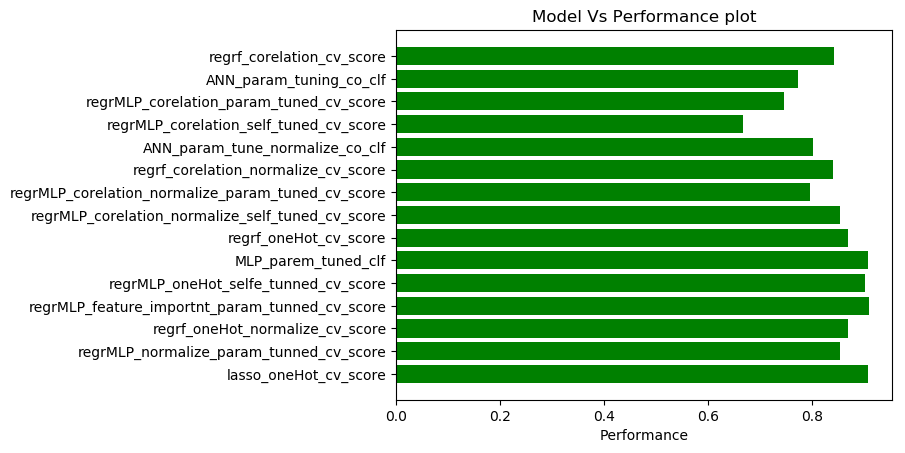

Max cross validation Score :  0.908723833736053
Max cross validation Score in :  regrMLP_feature_importnt_param_tunned_cv_score


In [98]:
plt.rcdefaults()
fig, ax = plt.subplots()


# Example data
used_algos = ['regrf_corelation_cv_score','ANN_param_tuning_co_clf','regrMLP_corelation_param_tuned_cv_score',
          'regrMLP_corelation_self_tuned_cv_score','ANN_param_tune_normalize_co_clf','regrf_corelation_normalize_cv_score',
          'regrMLP_corelation_normalize_param_tuned_cv_score','regrMLP_corelation_normalize_self_tuned_cv_score',
         'regrf_oneHot_cv_score','MLP_parem_tuned_clf','regrMLP_oneHot_selfe_tunned_cv_score',
         'regrMLP_feature_importnt_param_tunned_cv_score','regrf_oneHot_normalize_cv_score',
         'regrMLP_normalize_param_tunned_cv_score','lasso_oneHot_cv_score']
y_pos = np.arange(len(used_algos))
performance = [regrf_corelation_cv_score,ANN_param_tuning_co_clf.best_score_,regrMLP_corelation_param_tuned_cv_score,
          regrMLP_corelation_self_tuned_cv_score,ANN_param_tune_normalize_co_clf.best_score_,regrf_corelation_normalize_cv_score,
          regrMLP_corelation_normalize_param_tuned_cv_score,regrMLP_corelation_normalize_self_tuned_cv_score,
         regrf_oneHot_cv_score,MLP_parem_tuned_clf.best_score_,regrMLP_oneHot_selfe_tunned_cv_score,
         regrMLP_feature_importnt_param_tunned_cv_score.best_score_,regrf_oneHot_normalize_cv_score,
         regrMLP_normalize_param_tunned_cv_score.best_score_,lasso_oneHot_cv_score]
error = np.random.rand(len(used_algos))

ax.barh(y_pos, performance,color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(used_algos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Model Vs Performance plot')

plt.show()
max_cv_score = max(performance)
max_score = used_algos[performance.index(max_cv_score)]
print("Max cross validation Score : " ,format(max_cv_score))
print("Max cross validation Score in : " ,format(max_score))

<a id="CONCLUSION"></a>
## STEP 5.0 : CONCLUSION

From the assesment above, we can conclusively say that with the tuning of the parameters the way it was done, Lasso has the best accuarcy with MLPregressor closely following. The Lasso algorithm also works faster than the MLPregressor (ANN). However since the criteria was ANN, I've submitted the ANN score to kaggle and my score was **0.12495**
<br>
<br>
And my best score in kaggle is ** 0.11732** using **Lasso**

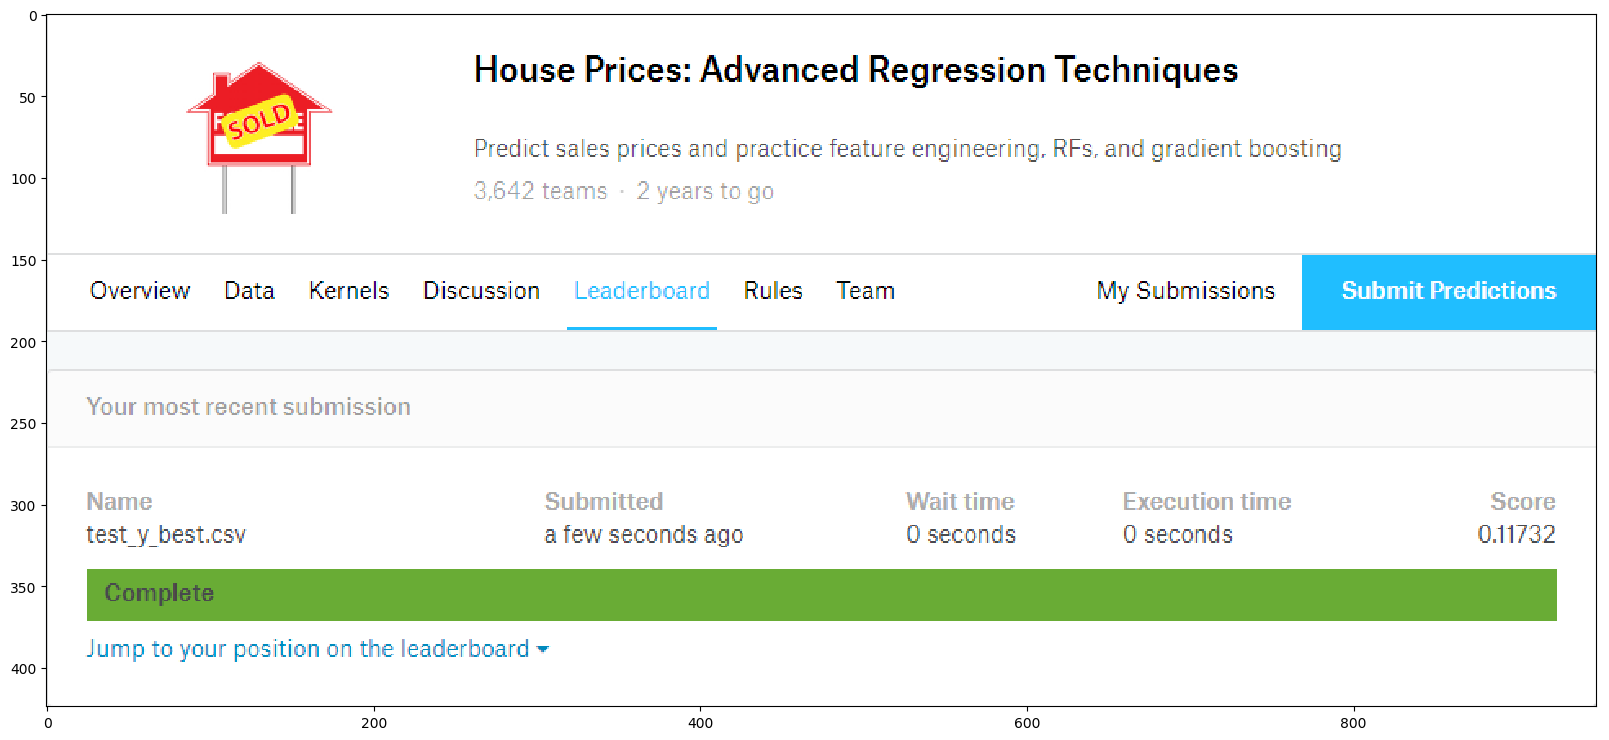

In [90]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
img=mpimg.imread('best_score.png')
imgplot = plt.imshow(img)
plt.show()

<a id="REFERENCES"></a>
## STEP 6.0 : REFERENCES

**1 . Number of noods for ANN - ** http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-10.html <br>
**2 . Outlier detection - ** http://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html (Got the link from stackoverflow) <br>
**3 . Data distribution & skewness - ** http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-21.html <br>
**4 . Box-Cox transformation - **https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html (Got the link from stackoverflow) <br>
**5 . Optimal feature - ** http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html <br>
**6 . Ranking features - ** http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html<br>
**7 . Tuner(parameter tuning) -** http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html <br>